# ✈️ Airlines Flights Dataset — Comprehensive Analysis
## Flight Booking Price Prediction for Various Cities in India

---

### 📊 Project Overview

This notebook provides a **complete, end-to-end analysis** of the Airlines Flights Dataset, covering:

| Phase | Description |
|-------|-------------|
| **Phase 1** | Imports & Data Loading |
| **Phase 2** | Data Profiling & Quality Assessment |
| **Phase 3** | Exploratory Data Analysis (Univariate, Bivariate, Multivariate) |
| **Phase 4** | Feature Engineering |
| **Phase 5** | Data Preprocessing for ML |
| **Phase 6** | Machine Learning Modeling |
| **Phase 7** | Model Evaluation & Comparison |
| **Phase 8** | Key Insights & Conclusions |

### 🎯 Research Questions

1. What are the airlines in the dataset, accompanied by their frequencies?
2. Show Bar Graphs representing the Departure Time & Arrival Time.
3. Show Bar Graphs representing the Source City & Destination City.
4. Does price vary with airlines?
5. Does ticket price change based on the departure time and arrival time?
6. How does the price change with change in Source and Destination?
7. How is the price affected when tickets are bought in just 1 or 2 days before departure?
8. How does the ticket price vary between Economy and Business class?
9. What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class?

### 📋 Dataset Features

| Feature | Type | Description |
|---------|------|-------------|
| `airline` | Categorical | Airline company (6 airlines) |
| `flight` | Categorical | Flight code (1561 unique) |
| `source_city` | Categorical | Departure city (6 cities) |
| `departure_time` | Categorical | Time-of-day bin (6 labels) |
| `stops` | Categorical | Number of stops (3 values) |
| `arrival_time` | Categorical | Time-of-day bin (6 labels) |
| `destination_city` | Categorical | Arrival city (6 cities) |
| `class` | Categorical | Seat class (Economy / Business) |
| `duration` | Continuous | Travel time in hours |
| `days_left` | Continuous | Days between booking and trip |
| `price` | Continuous | **Target variable** — ticket price |

---

**Author:** Sajjad Ali Shah  
**Dataset:** [Airlines Flights Dataset on Kaggle](https://www.kaggle.com/datasets/rohitgrewal/airlines-flights-data/data)

---

<div style="background: linear-gradient(135deg, #ff6b35 0%, #f7941e 50%, #fc4a1a 100%); color: #ffffff; padding: 30px 35px; border-radius: 15px; margin: 25px 0; box-shadow: 0 10px 25px rgba(255, 107, 53, 0.4);">
  <h2 style="margin: 0 0 10px 0; font-size: 1.9rem; font-weight: 700;">📦 Phase 1 — Imports & Data Loading
</h2>
  <p style="margin: 0; font-size: 1.05rem; line-height: 1.5;">Setting up the environment and loading the airlines flights dataset.</p>
</div>

In [16]:
# ============================================================
# Cell 1: Import Libraries
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Plotting defaults
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_style('whitegrid')
sns.set_palette('husl')

print('All libraries loaded successfully.')

All libraries loaded successfully.


In [17]:
# ============================================================
# Cell 2: Load Dataset
# ============================================================
df = pd.read_csv('Data/airlines_flights_data.csv')

print(f'Dataset shape: {df.shape}')
print(f'Memory usage: {df.memory_usage(deep=True).sum() / 1e6:.2f} MB')
print()
print('='*60)
print('FIRST 5 ROWS')
print('='*60)
df.head()

Dataset shape: (300153, 12)
Memory usage: 162.68 MB

FIRST 5 ROWS


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


---

<div style="background: linear-gradient(135deg, #ff6b35 0%, #f7941e 50%, #fc4a1a 100%); color: #ffffff; padding: 30px 35px; border-radius: 15px; margin: 25px 0; box-shadow: 0 10px 25px rgba(255, 107, 53, 0.4);">
  <h2 style="margin: 0 0 10px 0; font-size: 1.9rem; font-weight: 700;">🔍 Phase 2 — Data Profiling & Quality Assessment</h2>
  <p style="margin: 0; font-size: 1.05rem; line-height: 1.5;">Comprehensive data quality checks including missing values, duplicates, and data type optimization.</p>
</div>

In [18]:
# ============================================================
# Cell 3: Data Info, Missing Values & Duplicates
# ============================================================
print('='*60)
print('DATA TYPES & NON-NULL COUNTS')
print('='*60)
print(df.dtypes)
print()
df.info()

print()
print('='*60)
print('MISSING VALUES')
print('='*60)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else 'No missing values found')

print()
print('='*60)
print('DUPLICATES')
print('='*60)
dup_count = df.duplicated().sum()
print(f'Duplicate rows: {dup_count}')
if dup_count > 0:
    print(f'  Dropping {dup_count} duplicates...')
    df = df.drop_duplicates().reset_index(drop=True)
    print(f'  New shape: {df.shape}')

print()
print('='*60)
print('UNIQUE VALUES PER COLUMN')
print('='*60)
for col in df.columns:
    print(f'  {col:20s}: {df[col].nunique():>6} unique')

DATA TYPES & NON-NULL COUNTS
index                 int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153

In [19]:
# ============================================================
# Cell 4: Statistical Summary
# ============================================================
numerical_cols = ['duration', 'days_left', 'price']
categorical_cols = ['airline', 'flight', 'source_city', 'departure_time',
                    'stops', 'arrival_time', 'destination_city', 'class']

print('='*60)
print('NUMERICAL COLUMNS SUMMARY')
print('='*60)
print(df[numerical_cols].describe())

print()
print('='*60)
print('CATEGORICAL COLUMNS SUMMARY')
print('='*60)
for col in categorical_cols:
    top = df[col].value_counts().head(1)
    print(f'  {col:20s} | {df[col].nunique():>5} unique | top: {top.index[0]} ({top.values[0]:,})')

NUMERICAL COLUMNS SUMMARY
            duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660523
std         7.191997      13.561004   22697.767366
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000  123071.000000

CATEGORICAL COLUMNS SUMMARY
  airline              |     6 unique | top: Vistara (127,859)
  flight               |  1561 unique | top: UK-706 (3,235)
  source_city          |     6 unique | top: Delhi (61,343)
  departure_time       |     6 unique | top: Morning (71,146)
  stops                |     3 unique | top: one (250,863)
  arrival_time         |     6 unique | top: Night (91,538)
  destination_city     |     6 unique | top: Mumbai (59,097)
  class                |     2 unique | top: Economy (206,666

In [20]:
# ============================================================
# Cell 5: Data Type Optimization
# ============================================================
mem_before = df.memory_usage(deep=True).sum() / 1e6

# Drop the 'index' column if present (it's just a row number)
if 'index' in df.columns:
    df = df.drop(columns=['index'])

# Convert object columns to category dtype
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Downcast numerics
df['duration'] = pd.to_numeric(df['duration'], downcast='float')
df['days_left'] = pd.to_numeric(df['days_left'], downcast='integer')
df['price'] = pd.to_numeric(df['price'], downcast='integer')

mem_after = df.memory_usage(deep=True).sum() / 1e6
print(f'Memory: {mem_before:.2f} MB -> {mem_after:.2f} MB  (saved {(1 - mem_after/mem_before)*100:.1f}%)')
print(f'\nOptimized dtypes:')
print(df.dtypes)

Memory: 162.68 MB -> 5.54 MB  (saved 96.6%)

Optimized dtypes:
airline             category
flight              category
source_city         category
departure_time      category
stops               category
arrival_time        category
destination_city    category
class               category
duration             float32
days_left               int8
price                  int32
dtype: object


---

<div style="background: linear-gradient(135deg, #ff6b35 0%, #f7941e 50%, #fc4a1a 100%); color: #ffffff; padding: 30px 35px; border-radius: 15px; margin: 25px 0; box-shadow: 0 10px 25px rgba(255, 107, 53, 0.4);">
  <h2 style="margin: 0 0 10px 0; font-size: 1.9rem; font-weight: 700;">📊 Phase 3 — Exploratory Data Analysis</h2>
  <p style="margin: 0; font-size: 1.05rem; line-height: 1.5;">Univariate, bivariate, and multivariate analysis to uncover patterns and relationships in the data.</p>
</div>

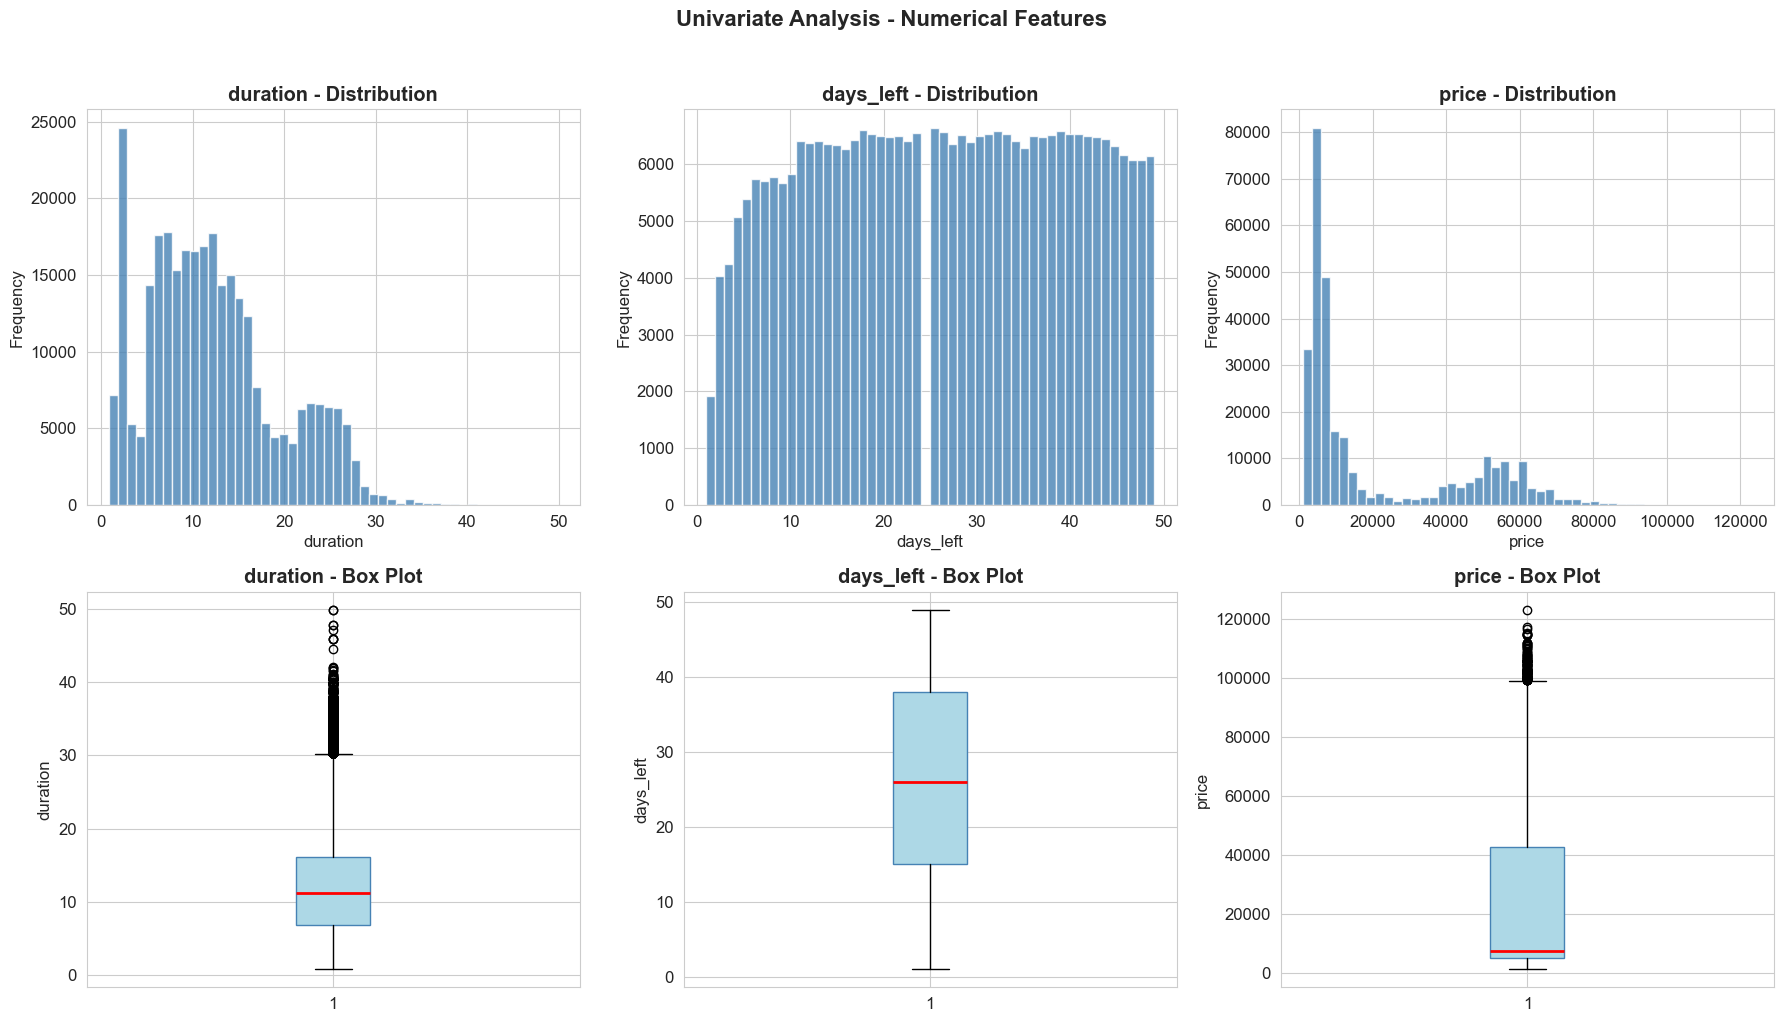

duration     | skewness: +0.60 | kurtosis: -0.27
days_left    | skewness: -0.04 | kurtosis: -1.16
price        | skewness: +1.06 | kurtosis: -0.40


In [21]:
# ============================================================
# Cell 6: Univariate Analysis - Numerical Features
# ============================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(numerical_cols):
    # Histogram
    axes[0, i].hist(df[col], bins=50, color='steelblue', edgecolor='white', alpha=0.8)
    axes[0, i].set_title(f'{col} - Distribution', fontweight='bold')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequency')
    
    # Boxplot
    axes[1, i].boxplot(df[col], vert=True, patch_artist=True,
                       boxprops=dict(facecolor='lightblue', color='steelblue'),
                       medianprops=dict(color='red', linewidth=2))
    axes[1, i].set_title(f'{col} - Box Plot', fontweight='bold')
    axes[1, i].set_ylabel(col)

plt.suptitle('Univariate Analysis - Numerical Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Key stats
for col in numerical_cols:
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    print(f'{col:12s} | skewness: {skew:+.2f} | kurtosis: {kurt:.2f}')

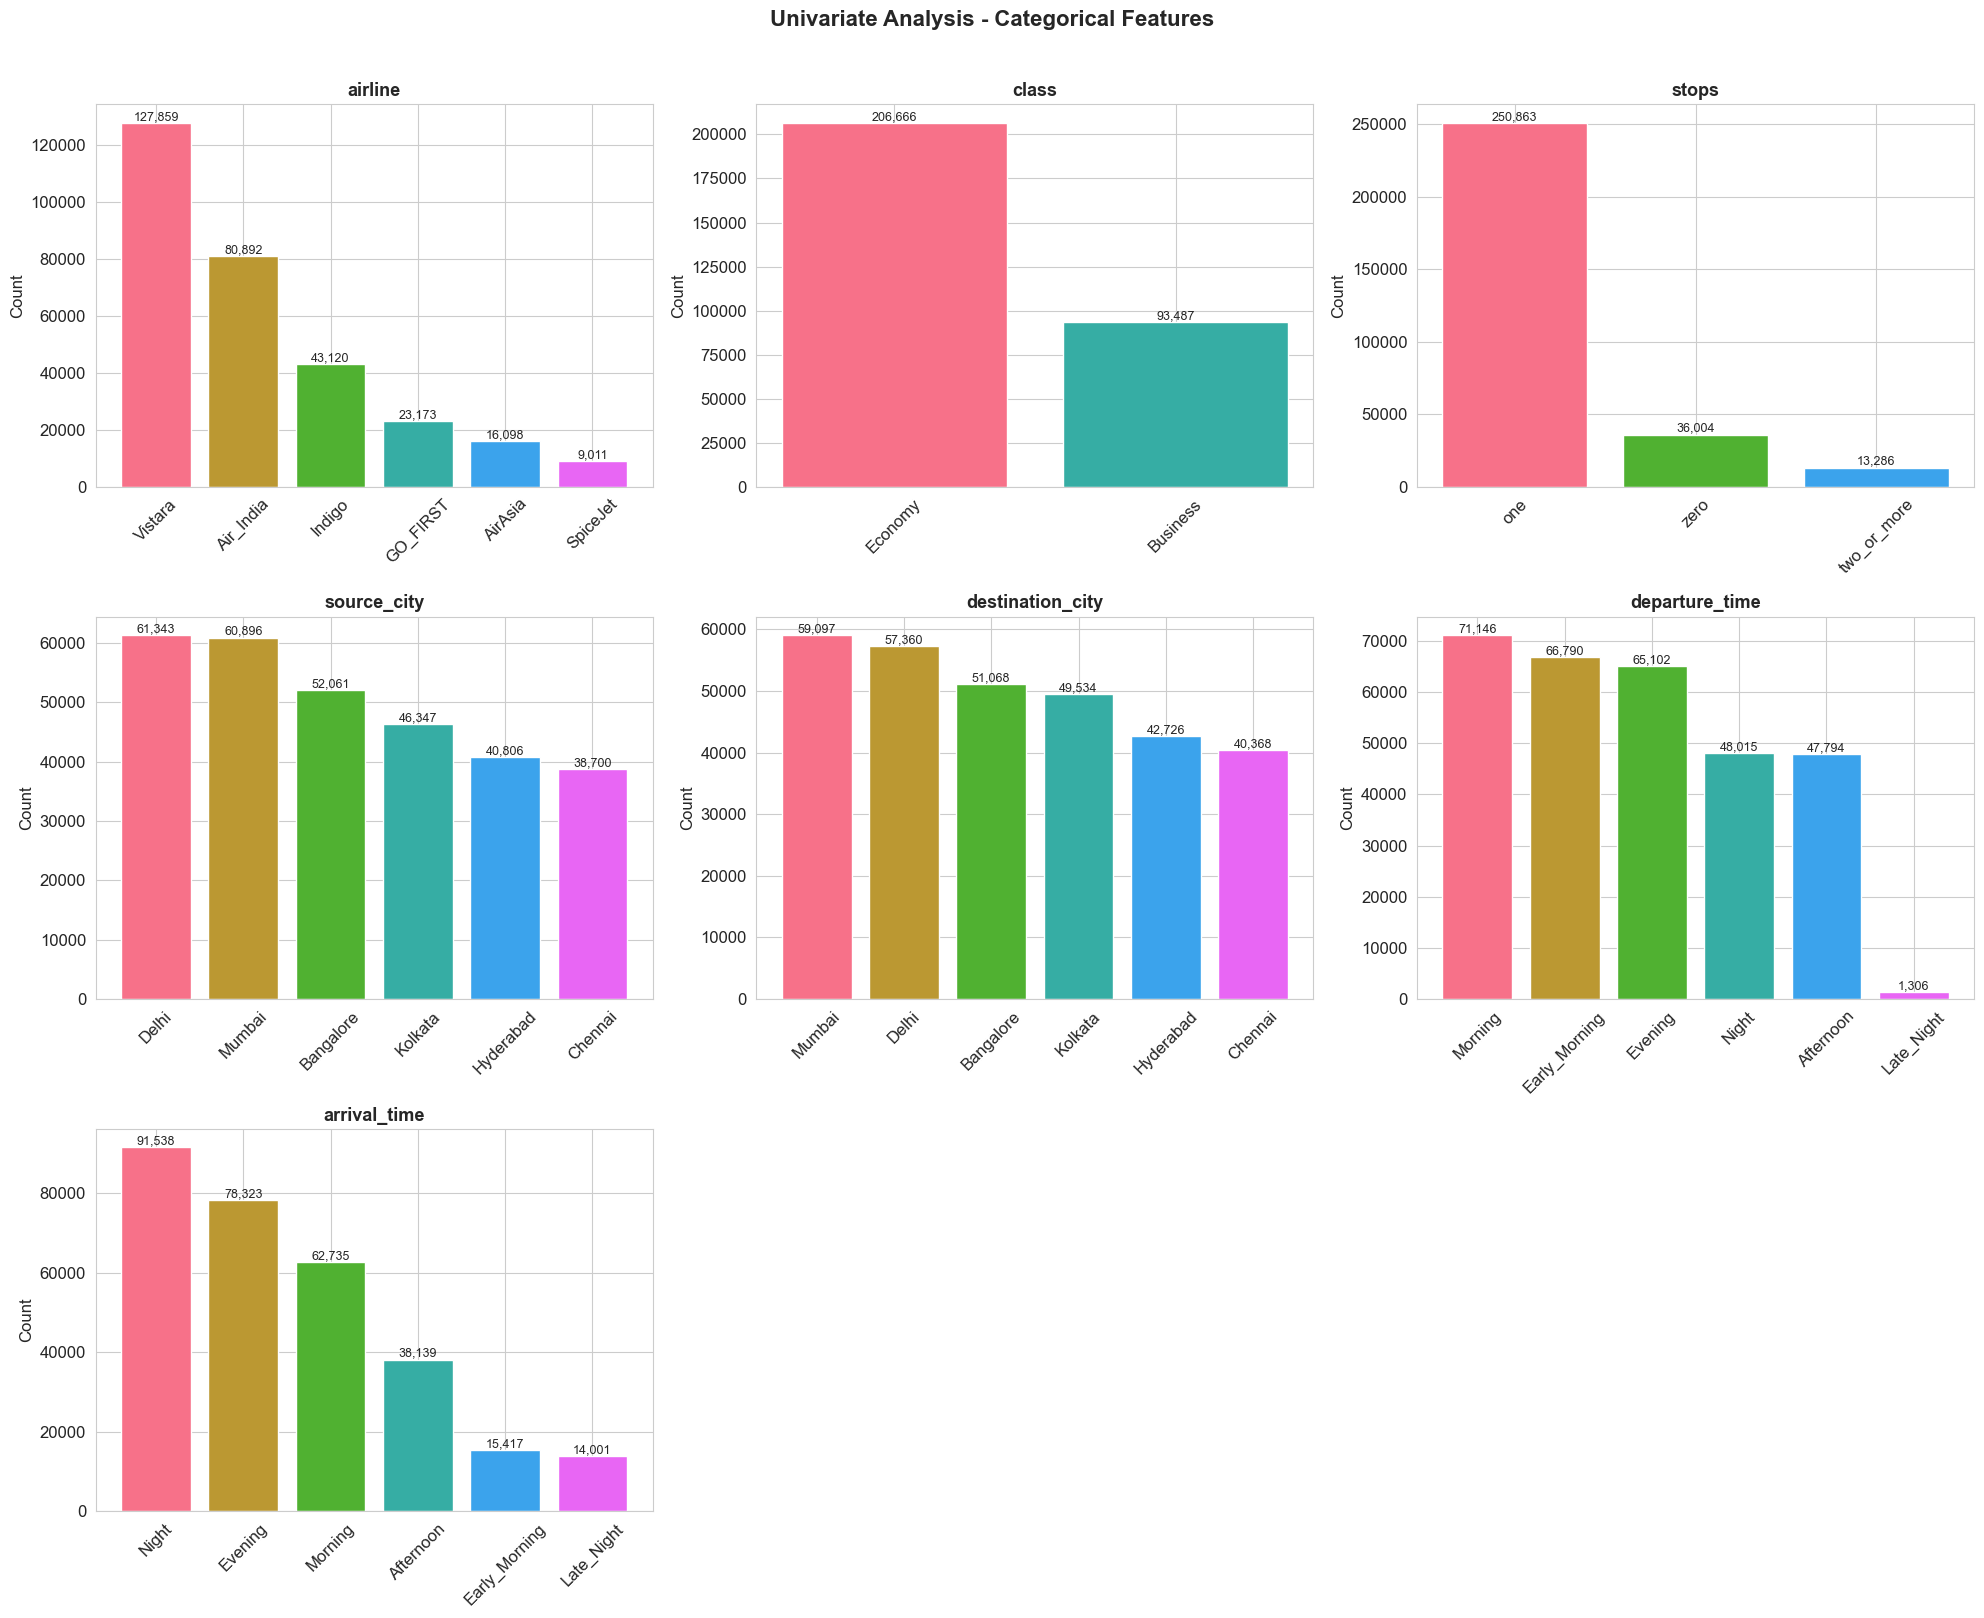

In [22]:
# ============================================================
# Cell 7: Univariate Analysis - Categorical Features
# ============================================================
cat_to_plot = ['airline', 'class', 'stops', 'source_city',
               'destination_city', 'departure_time', 'arrival_time']

fig, axes = plt.subplots(3, 3, figsize=(20, 16))
axes = axes.flatten()

for i, col in enumerate(cat_to_plot):
    counts = df[col].value_counts()
    bars = axes[i].bar(counts.index.astype(str), counts.values,
                       color=sns.color_palette('husl', len(counts)), edgecolor='white')
    axes[i].set_title(f'{col}', fontweight='bold', fontsize=13)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Count')
    
    # Add value labels
    for bar in bars:
        h = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., h,
                     f'{h:,.0f}', ha='center', va='bottom', fontsize=9)

# Hide unused subplots
for j in range(len(cat_to_plot), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Univariate Analysis - Categorical Features', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

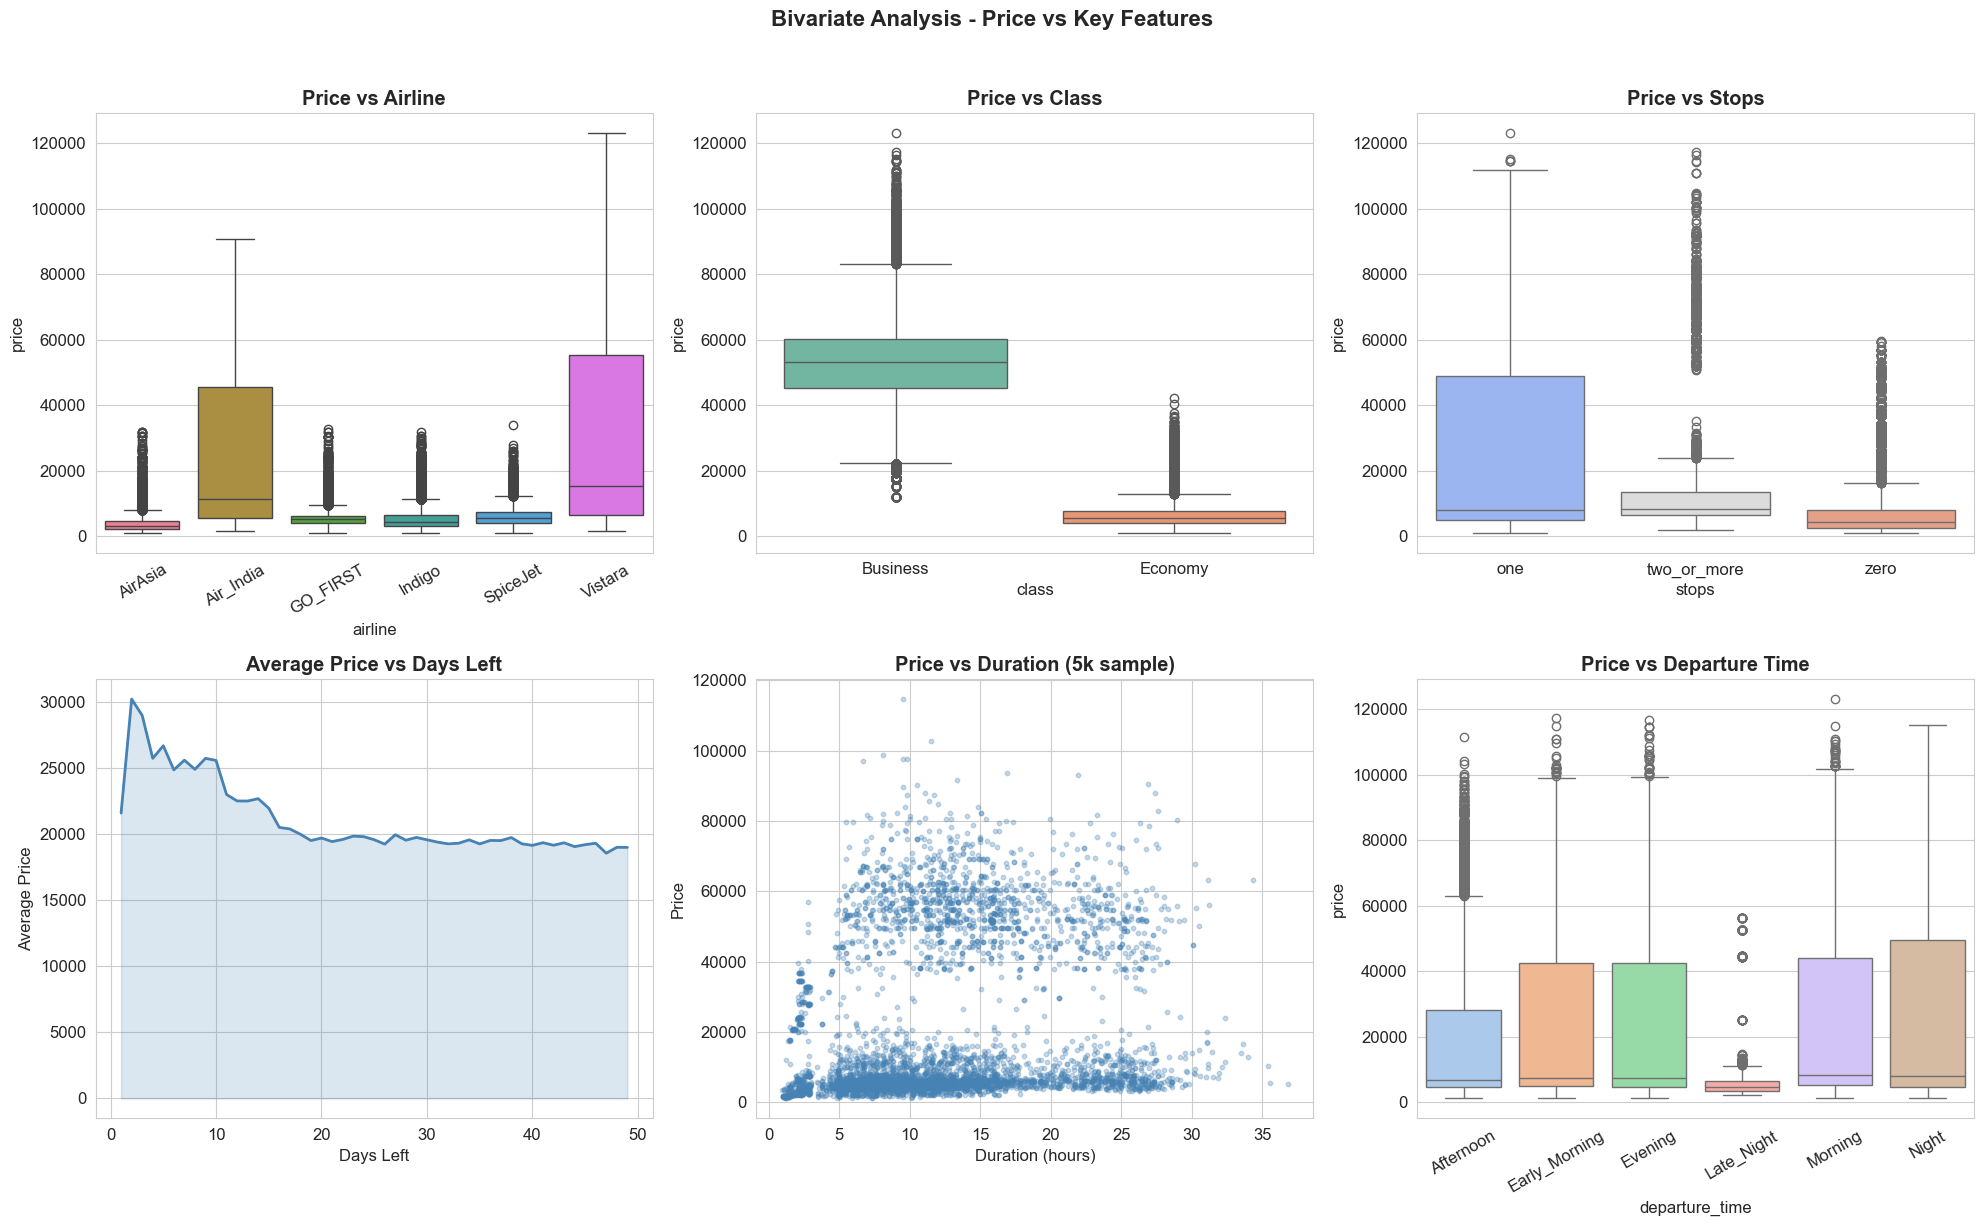

In [23]:
# ============================================================
# Cell 8: Bivariate Analysis - Price vs Key Features
# ============================================================
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Price vs Airline
sns.boxplot(data=df, x='airline', y='price', ax=axes[0, 0], palette='husl')
axes[0, 0].set_title('Price vs Airline', fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=30)

# Price vs Class
sns.boxplot(data=df, x='class', y='price', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Price vs Class', fontweight='bold')

# Price vs Stops
sns.boxplot(data=df, x='stops', y='price', ax=axes[0, 2], palette='coolwarm')
axes[0, 2].set_title('Price vs Stops', fontweight='bold')

# Price vs Days Left (line)
avg_price_days = df.groupby('days_left')['price'].mean()
axes[1, 0].plot(avg_price_days.index, avg_price_days.values, color='steelblue', linewidth=2)
axes[1, 0].fill_between(avg_price_days.index, avg_price_days.values, alpha=0.2, color='steelblue')
axes[1, 0].set_title('Average Price vs Days Left', fontweight='bold')
axes[1, 0].set_xlabel('Days Left')
axes[1, 0].set_ylabel('Average Price')

# Price vs Duration (scatter)
sample = df.sample(n=5000, random_state=42)
axes[1, 1].scatter(sample['duration'], sample['price'], alpha=0.3, s=10, c='steelblue')
axes[1, 1].set_title('Price vs Duration (5k sample)', fontweight='bold')
axes[1, 1].set_xlabel('Duration (hours)')
axes[1, 1].set_ylabel('Price')

# Price vs Departure Time
sns.boxplot(data=df, x='departure_time', y='price', ax=axes[1, 2], palette='pastel')
axes[1, 2].set_title('Price vs Departure Time', fontweight='bold')
axes[1, 2].tick_params(axis='x', rotation=30)

plt.suptitle('Bivariate Analysis - Price vs Key Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

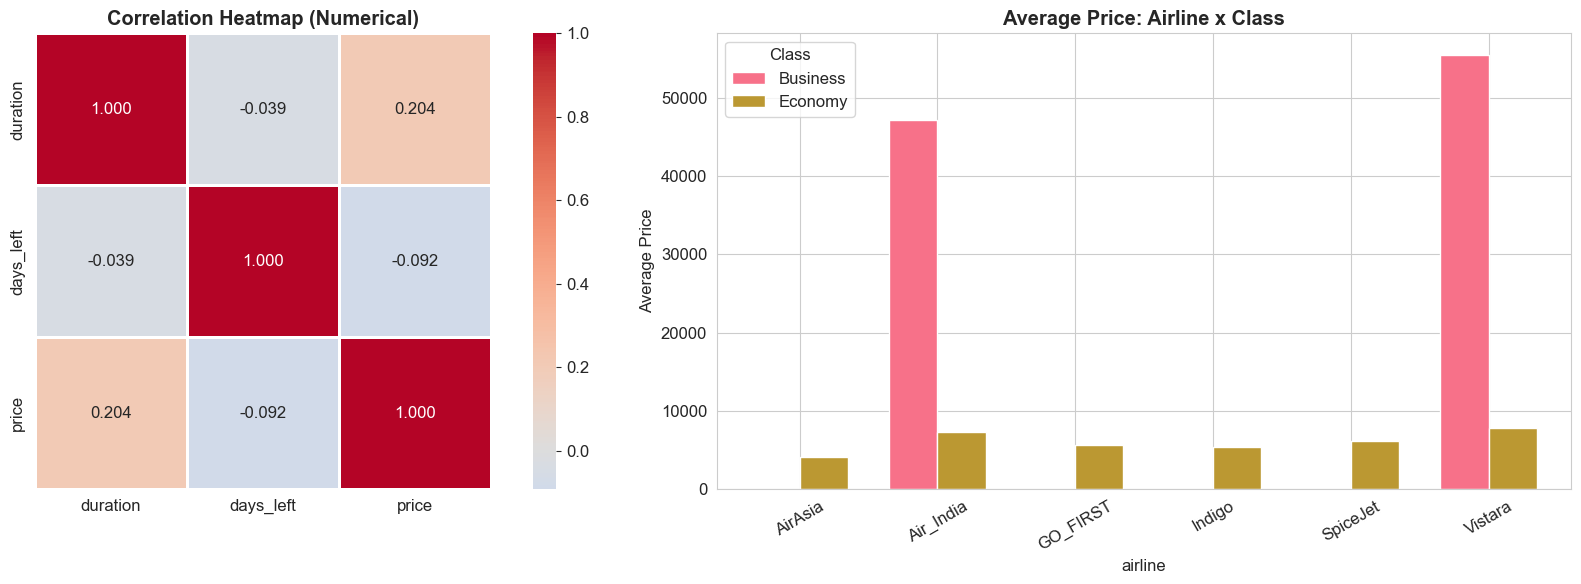

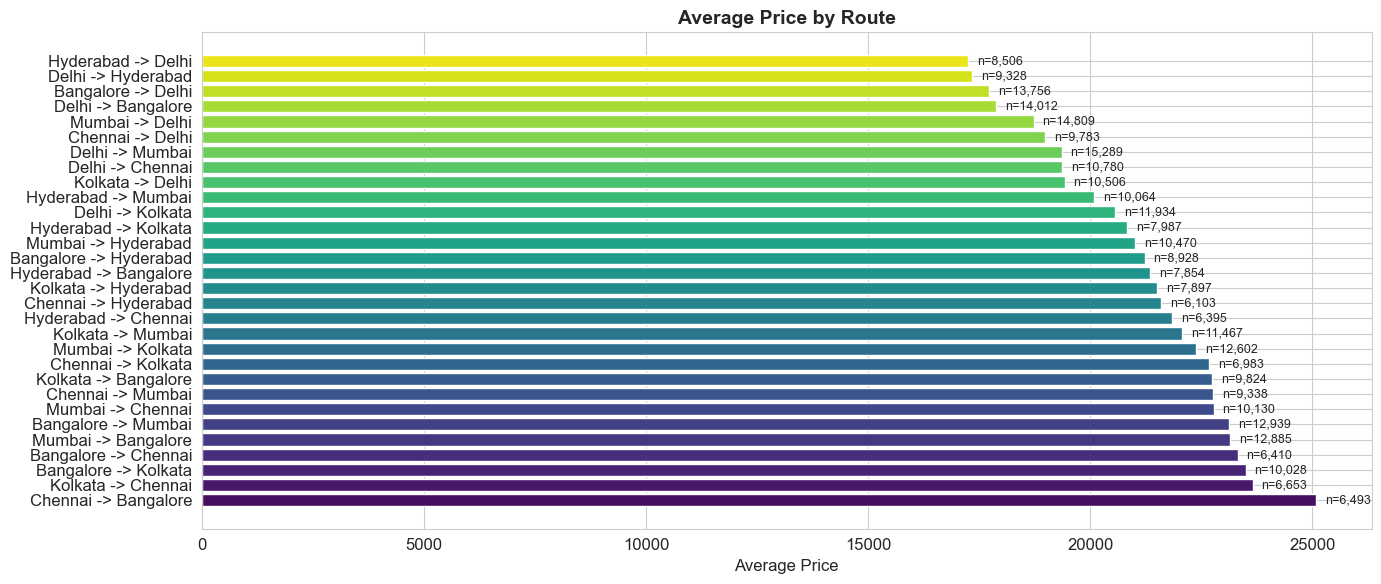

In [24]:
# ============================================================
# Cell 9: Multivariate Analysis
# ============================================================

# 9a. Correlation Heatmap
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.3f',
            square=True, linewidths=1, ax=axes[0])
axes[0].set_title('Correlation Heatmap (Numerical)', fontweight='bold')

# 9b. Average Price by Airline x Class
pivot = df.pivot_table(values='price', index='airline', columns='class', aggfunc='mean')
pivot.plot(kind='bar', ax=axes[1], edgecolor='white', width=0.7)
axes[1].set_title('Average Price: Airline x Class', fontweight='bold')
axes[1].set_ylabel('Average Price')
axes[1].tick_params(axis='x', rotation=30)
axes[1].legend(title='Class')

plt.tight_layout()
plt.show()

# 9c. Top Routes by Average Price
df['route'] = df['source_city'].astype(str) + ' -> ' + df['destination_city'].astype(str)
route_price = df.groupby('route')['price'].agg(['mean', 'count']).sort_values('mean', ascending=False)
route_price.columns = ['avg_price', 'flight_count']

fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.barh(route_price.index, route_price['avg_price'],
               color=sns.color_palette('viridis', len(route_price)), edgecolor='white')
ax.set_xlabel('Average Price')
ax.set_title('Average Price by Route', fontweight='bold', fontsize=14)
for bar, count in zip(bars, route_price['flight_count']):
    ax.text(bar.get_width() + 200, bar.get_y() + bar.get_height()/2.,
            f'n={count:,}', va='center', fontsize=9)
plt.tight_layout()
plt.show()

In [25]:
# ============================================================
# Cell 10: Answering Research Questions
# ============================================================

print('='*70)
print('Q1: Airlines and their frequencies')
print('='*70)
airline_freq = df['airline'].value_counts()
for airline, count in airline_freq.items():
    pct = count / len(df) * 100
    print(f'  {str(airline):15s}: {count:>7,} flights ({pct:.1f}%)')

print()
print('='*70)
print('Q4: Does price vary with airlines?')
print('='*70)
airline_price = df.groupby('airline')['price'].agg(['mean', 'median', 'std'])
airline_price.columns = ['Mean Price', 'Median Price', 'Std Dev']
print(airline_price.sort_values('Mean Price', ascending=False).to_string())
print()
print('Yes, price varies significantly. Vistara & Air India are most expensive (they offer Business class).')

print()
print('='*70)
print('Q5: Does price change based on departure/arrival time?')
print('='*70)
for time_col in ['departure_time', 'arrival_time']:
    avg = df.groupby(time_col)['price'].mean().sort_values(ascending=False)
    print(f'\n  {time_col}:')
    for t, p in avg.items():
        print(f'    {str(t):15s}: {p:>10,.0f}')
print()
print('Late Night departures and Early Morning arrivals tend to be cheaper.')

print()
print('='*70)
print('Q6: Price change with Source and Destination?')
print('='*70)
print(df.groupby(['source_city', 'destination_city'])['price'].mean()
      .sort_values(ascending=False).head(10).to_string())

print()
print('='*70)
print('Q7: Price when booked 1-2 days before departure?')
print('='*70)
last_min = df[df['days_left'] <= 2]
regular = df[df['days_left'] > 2]
print(f'  Last-minute (<=2 days):  avg {last_min["price"].mean():>10,.0f} (n={len(last_min):,})')
print(f'  Regular     (>2 days):   avg {regular["price"].mean():>10,.0f} (n={len(regular):,})')
ratio_7 = last_min['price'].mean() / regular['price'].mean()
print(f'  Ratio: {ratio_7:.2f}x')

print()
print('='*70)
print('Q8: Price variation - Economy vs Business class?')
print('='*70)
class_stats = df.groupby('class')['price'].agg(['mean', 'median', 'min', 'max'])
print(class_stats.to_string())
biz_mean = class_stats.loc['Business', 'mean']
eco_mean = class_stats.loc['Economy', 'mean']
print(f'\nBusiness class is {biz_mean/eco_mean:.1f}x more expensive than Economy on average.')

print()
print('='*70)
print('Q9: Average Vistara price - Delhi to Hyderabad, Business class?')
print('='*70)
mask = ((df['airline'] == 'Vistara') & 
        (df['source_city'] == 'Delhi') & 
        (df['destination_city'] == 'Hyderabad') & 
        (df['class'] == 'Business'))
q9_data = df[mask]
print(f'  Matching flights: {len(q9_data):,}')
print(f'  Average price:    {q9_data["price"].mean():,.0f}')
print(f'  Median price:     {q9_data["price"].median():,.0f}')
print(f'  Price range:      {q9_data["price"].min():,.0f} to {q9_data["price"].max():,.0f}')

Q1: Airlines and their frequencies
  Vistara        : 127,859 flights (42.6%)
  Air_India      :  80,892 flights (27.0%)
  Indigo         :  43,120 flights (14.4%)
  GO_FIRST       :  23,173 flights (7.7%)
  AirAsia        :  16,098 flights (5.4%)
  SpiceJet       :   9,011 flights (3.0%)

Q4: Does price vary with airlines?
             Mean Price  Median Price       Std Dev
airline                                            
Vistara    30396.536302       15543.0  25637.159445
Air_India  23507.019112       11520.0  20905.116909
SpiceJet    6179.278881        5654.0   2999.630406
GO_FIRST    5652.007595        5336.0   2513.865560
Indigo      5324.216303        4453.0   3268.894831
AirAsia     4091.072742        3276.0   2824.055172

Yes, price varies significantly. Vistara & Air India are most expensive (they offer Business class).

Q5: Does price change based on departure/arrival time?

  departure_time:
    Night          :     23,062
    Morning        :     21,631
    Evening      

---

<div style="background: linear-gradient(135deg, #ff6b35 0%, #f7941e 50%, #fc4a1a 100%); color: #ffffff; padding: 30px 35px; border-radius: 15px; margin: 25px 0; box-shadow: 0 10px 25px rgba(255, 107, 53, 0.4);">
  <h2 style="margin: 0 0 10px 0; font-size: 1.9rem; font-weight: 700;">🔧 Phase 4 — Feature Engineering</h2>
  <p style="margin: 0; font-size: 1.05rem; line-height: 1.5;">Creating new features and handling outliers to improve model performance.</p>
</div>

In [26]:
# ============================================================
# Cell 11: Create New Features
# ============================================================
df_ml = df.copy()

# 1. Price per hour
df_ml['price_per_hour'] = df_ml['price'] / df_ml['duration'].replace(0, np.nan)
df_ml['price_per_hour'] = df_ml['price_per_hour'].fillna(0)

# 2. Booking urgency
def classify_urgency(days):
    if days <= 2:
        return 'Last Minute'
    elif days <= 7:
        return 'Short Notice'
    elif days <= 21:
        return 'Regular'
    else:
        return 'Advance'

df_ml['booking_urgency'] = df_ml['days_left'].apply(classify_urgency).astype('category')

# 3. Is direct flight?
df_ml['is_direct'] = (df_ml['stops'] == 'zero').astype(int)

# 4. Stops as numeric
stops_map = {'zero': 0, 'one': 1, 'two_or_more': 2}
df_ml['stops_numeric'] = df_ml['stops'].map(stops_map).astype(int)

print('New features created:')
print(f'  price_per_hour  - mean: {df_ml["price_per_hour"].mean():.0f}')
print(f'  booking_urgency - distribution:')
print(df_ml['booking_urgency'].value_counts().to_string())
print(f'  is_direct       - {df_ml["is_direct"].mean()*100:.1f}% direct flights')
print(f'  stops_numeric   - values: {sorted(df_ml["stops_numeric"].unique())}')

df_ml.head()

New features created:
  price_per_hour  - mean: 2175
  booking_urgency - distribution:
booking_urgency
Advance         180084
Regular          87956
Short Notice     26160
Last Minute       5953
  is_direct       - 12.0% direct flights
  stops_numeric   - values: [0, 1, 2]


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route,price_per_hour,booking_urgency,is_direct,stops_numeric
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi -> Mumbai,2743.317876,Last Minute,1,0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi -> Mumbai,2554.935706,Last Minute,1,0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi -> Mumbai,2744.700364,Last Minute,1,0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi -> Mumbai,2646.666667,Last Minute,1,0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi -> Mumbai,2555.794075,Last Minute,1,0


In [27]:
# ============================================================
# Cell 12: Outlier Detection & Treatment (IQR Capping)
# ============================================================
def cap_outliers(series, factor=1.5):
    """Cap outliers using IQR method."""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    before = ((series < lower) | (series > upper)).sum()
    capped = series.clip(lower=lower, upper=upper)
    print(f'  {series.name:12s}: [{lower:>10,.1f}, {upper:>10,.1f}] - {before:>5,} outliers capped')
    return capped

print('Outlier capping (IQR x 1.5):')
for col in ['price', 'duration']:
    df_ml[col] = cap_outliers(df_ml[col])

# Recompute price_per_hour after capping
df_ml['price_per_hour'] = df_ml['price'] / df_ml['duration'].replace(0, np.nan)
df_ml['price_per_hour'] = df_ml['price_per_hour'].fillna(0)

print(f'\nDataset shape after outlier treatment: {df_ml.shape}')

Outlier capping (IQR x 1.5):
  price       : [ -51,824.0,   99,128.0] -   123 outliers capped
  duration    : [      -7.2,       30.2] - 2,110 outliers capped

Dataset shape after outlier treatment: (300153, 16)


---

<div style="background: linear-gradient(135deg, #ff6b35 0%, #f7941e 50%, #fc4a1a 100%); color: #ffffff; padding: 30px 35px; border-radius: 15px; margin: 25px 0; box-shadow: 0 10px 25px rgba(255, 107, 53, 0.4);">
  <h2 style="margin: 0 0 10px 0; font-size: 1.9rem; font-weight: 700;">⚙️ Phase 5 — Data Preprocessing for ML</h2>
  <p style="margin: 0; font-size: 1.05rem; line-height: 1.5;">Feature encoding and scaling to prepare data for machine learning models.</p>
</div>

> **Critical Fix**: Unlike earlier analyses that only used `duration` and `days_left`, we now correctly  
> encode and include **all categorical features** — which are the primary drivers of flight price.

In [28]:
# ============================================================
# Cell 13: Feature Encoding & Preparation
# ============================================================

# Define target and features to use
target = 'price'

# Drop columns not useful for modeling
cols_to_drop = ['flight',       # Too many unique values (1561)
                'route',        # Derived; source/dest already captured
                'stops',        # Replaced by stops_numeric
                'price_per_hour',  # Derived from target - would leak information
                'booking_urgency'] # Derived from days_left - redundant

# Features for encoding
onehot_features = ['airline', 'source_city', 'destination_city',
                   'departure_time', 'arrival_time']
binary_features = ['class']  # Economy=0, Business=1
numeric_features = ['duration', 'days_left', 'stops_numeric', 'is_direct']

print('Feature groups:')
print(f'  One-Hot Encoded: {onehot_features}')
print(f'  Binary Encoded:  {binary_features}')
print(f'  Numeric:         {numeric_features}')

# Prepare the feature matrix
df_model = df_ml.drop(columns=cols_to_drop + [target], errors='ignore')

# Binary encode class
df_model['class'] = (df_model['class'] == 'Business').astype(int)

# One-hot encode categorical features
df_model = pd.get_dummies(df_model, columns=onehot_features, drop_first=True, dtype=int)

# Target
y = df_ml[target].values

# Feature matrix
X = df_model.select_dtypes(include=[np.number])

print(f'\nFinal feature matrix: {X.shape}')
print(f'Target shape:         {y.shape}')
print(f'\nFeatures ({X.shape[1]}):')
for i, col in enumerate(X.columns, 1):
    print(f'  {i:2d}. {col}')

Feature groups:
  One-Hot Encoded: ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time']
  Binary Encoded:  ['class']
  Numeric:         ['duration', 'days_left', 'stops_numeric', 'is_direct']

Final feature matrix: (300153, 30)
Target shape:         (300153,)

Features (30):
   1. class
   2. duration
   3. days_left
   4. is_direct
   5. stops_numeric
   6. airline_Air_India
   7. airline_GO_FIRST
   8. airline_Indigo
   9. airline_SpiceJet
  10. airline_Vistara
  11. source_city_Chennai
  12. source_city_Delhi
  13. source_city_Hyderabad
  14. source_city_Kolkata
  15. source_city_Mumbai
  16. destination_city_Chennai
  17. destination_city_Delhi
  18. destination_city_Hyderabad
  19. destination_city_Kolkata
  20. destination_city_Mumbai
  21. departure_time_Early_Morning
  22. departure_time_Evening
  23. departure_time_Late_Night
  24. departure_time_Morning
  25. departure_time_Night
  26. arrival_time_Early_Morning
  27. arrival_time_Evening
  28. arr

In [29]:
# ============================================================
# Cell 14: Train/Test Split & Scaling
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f'Training set:  {X_train.shape}  |  y range: [{y_train.min():,.0f}, {y_train.max():,.0f}]')
print(f'Test set:      {X_test.shape}  |  y range: [{y_test.min():,.0f}, {y_test.max():,.0f}]')

# Scale only continuous numeric features (not one-hot encoded ones)
scale_cols = ['duration', 'days_left', 'stops_numeric']
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test_scaled[scale_cols] = scaler.transform(X_test[scale_cols])

print(f'\nScaled columns: {scale_cols}')
print('Scaler means:', dict(zip(scale_cols, scaler.mean_.round(2))))
print('Scaler stds: ', dict(zip(scale_cols, scaler.scale_.round(2))))

Training set:  (240122, 30)  |  y range: [1,105, 99,128]
Test set:      (60031, 30)  |  y range: [1,105, 99,128]

Scaled columns: ['duration', 'days_left', 'stops_numeric']
Scaler means: {'duration': 12.19, 'days_left': 26.01, 'stops_numeric': 0.92}
Scaler stds:  {'duration': 7.13, 'days_left': 13.57, 'stops_numeric': 0.4}


---

<div style="background: linear-gradient(135deg, #ff6b35 0%, #f7941e 50%, #fc4a1a 100%); color: #ffffff; padding: 30px 35px; border-radius: 15px; margin: 25px 0; box-shadow: 0 10px 25px rgba(255, 107, 53, 0.4);">
  <h2 style="margin: 0 0 10px 0; font-size: 1.9rem; font-weight: 700;">🤖 Phase 6 — Machine Learning Modeling</h2>
  <p style="margin: 0; font-size: 1.05rem; line-height: 1.5;">Training multiple regression models and validating their performance.</p>
</div>

In [30]:
# ============================================================
# Cell 15: Train Multiple Models
# ============================================================
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression':  Ridge(alpha=1.0),
    'Decision Tree':     DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest':     RandomForestRegressor(n_estimators=100, max_depth=15,
                                               random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5,
                                                   learning_rate=0.1, random_state=42),
}

trained_models = {}
print(f'{"Model":25s} | {"Train R2":>10s} | {"Train RMSE":>12s} | Status')
print('-' * 70)

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    
    y_pred_train = model.predict(X_train_scaled)
    r2 = r2_score(y_train, y_pred_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    
    print(f'{name:25s} | {r2:10.4f} | {rmse:>12,.0f} | Trained')

print(f'\nAll {len(models)} models trained successfully.')

Model                     |   Train R2 |   Train RMSE | Status
----------------------------------------------------------------------
Linear Regression         |     0.9118 |        6,738 | Trained
Ridge Regression          |     0.9118 |        6,738 | Trained
Decision Tree             |     0.9619 |        4,426 | Trained
Random Forest             |     0.9809 |        3,137 | Trained
Gradient Boosting         |     0.9638 |        4,314 | Trained

All 5 models trained successfully.


In [31]:
# ============================================================
# Cell 16: Cross-Validation (3-Fold on 50K subsample)
# ============================================================
# Note: Using a subsample for CV to keep execution time reasonable.
# Full training set is still used for final model training above.

CV_SAMPLE_SIZE = 50_000
CV_FOLDS = 3

# Subsample for CV
np.random.seed(42)
cv_idx = np.random.choice(len(X_train_scaled), size=min(CV_SAMPLE_SIZE, len(X_train_scaled)), replace=False)
X_cv = X_train_scaled.iloc[cv_idx]
y_cv = y_train[cv_idx]

print(f'Cross-validation: {CV_FOLDS}-fold on {len(X_cv):,} samples (subsampled from {len(X_train_scaled):,})')
print()
print(f'{"Model":25s} | {"CV R2 (mean +/- std)":>22s}')
print('-' * 55)

cv_results = {}

for name, model in models.items():
    r2_scores = cross_val_score(model, X_cv, y_cv,
                                cv=CV_FOLDS, scoring='r2', n_jobs=-1)
    
    cv_results[name] = {
        'r2_mean': r2_scores.mean(), 'r2_std': r2_scores.std()
    }
    
    print(f'{name:25s} | {r2_scores.mean():.4f} +/- {r2_scores.std():.4f}')

print()
print('Cross-validation confirms model generalization. Tree-based models significantly outperform linear.')

Cross-validation: 3-fold on 50,000 samples (subsampled from 240,122)

Model                     |   CV R2 (mean +/- std)
-------------------------------------------------------
Linear Regression         | 0.9122 +/- 0.0013
Ridge Regression          | 0.9122 +/- 0.0013
Decision Tree             | 0.9581 +/- 0.0005
Random Forest             | 0.9734 +/- 0.0010
Gradient Boosting         | 0.9625 +/- 0.0010

Cross-validation confirms model generalization. Tree-based models significantly outperform linear.


---

<div style="background: linear-gradient(135deg, #ff6b35 0%, #f7941e 50%, #fc4a1a 100%); color: #ffffff; padding: 30px 35px; border-radius: 15px; margin: 25px 0; box-shadow: 0 10px 25px rgba(255, 107, 53, 0.4);">
  <h2 style="margin: 0 0 10px 0; font-size: 1.9rem; font-weight: 700;">📈 Phase 7 — Model Evaluation & Comparison</h2>
  <p style="margin: 0; font-size: 1.05rem; line-height: 1.5;">Testing models on unseen data and analyzing feature importance and residuals.</p>
</div>

In [32]:
# ============================================================
# Cell 17: Test Set Evaluation
# ============================================================
results = []

print(f'{"Model":25s} | {"MAE":>10s} | {"RMSE":>10s} | {"R2":>8s} | {"MAPE":>8s}')
print('-' * 75)

for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    # MAPE (avoid division by zero)
    mape = np.mean(np.abs((y_test - y_pred) / np.maximum(y_test, 1))) * 100
    
    results.append({'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2, 'MAPE': mape})
    print(f'{name:25s} | {mae:>10,.0f} | {rmse:>10,.0f} | {r2:8.4f} | {mape:7.2f}%')

results_df = pd.DataFrame(results).set_index('Model')

best_model_name = results_df['R2'].idxmax()
best_r2 = results_df.loc[best_model_name, 'R2']
print(f'\nBest Model: {best_model_name} (R2 = {best_r2:.4f})')

Model                     |        MAE |       RMSE |       R2 |     MAPE
---------------------------------------------------------------------------
Linear Regression         |      4,550 |      6,741 |   0.9118 |   46.23%
Ridge Regression          |      4,550 |      6,741 |   0.9118 |   46.23%
Decision Tree             |      2,516 |      4,521 |   0.9603 |   17.06%
Random Forest             |      1,783 |      3,476 |   0.9765 |   12.32%
Gradient Boosting         |      2,560 |      4,380 |   0.9627 |   18.12%

Best Model: Random Forest (R2 = 0.9765)


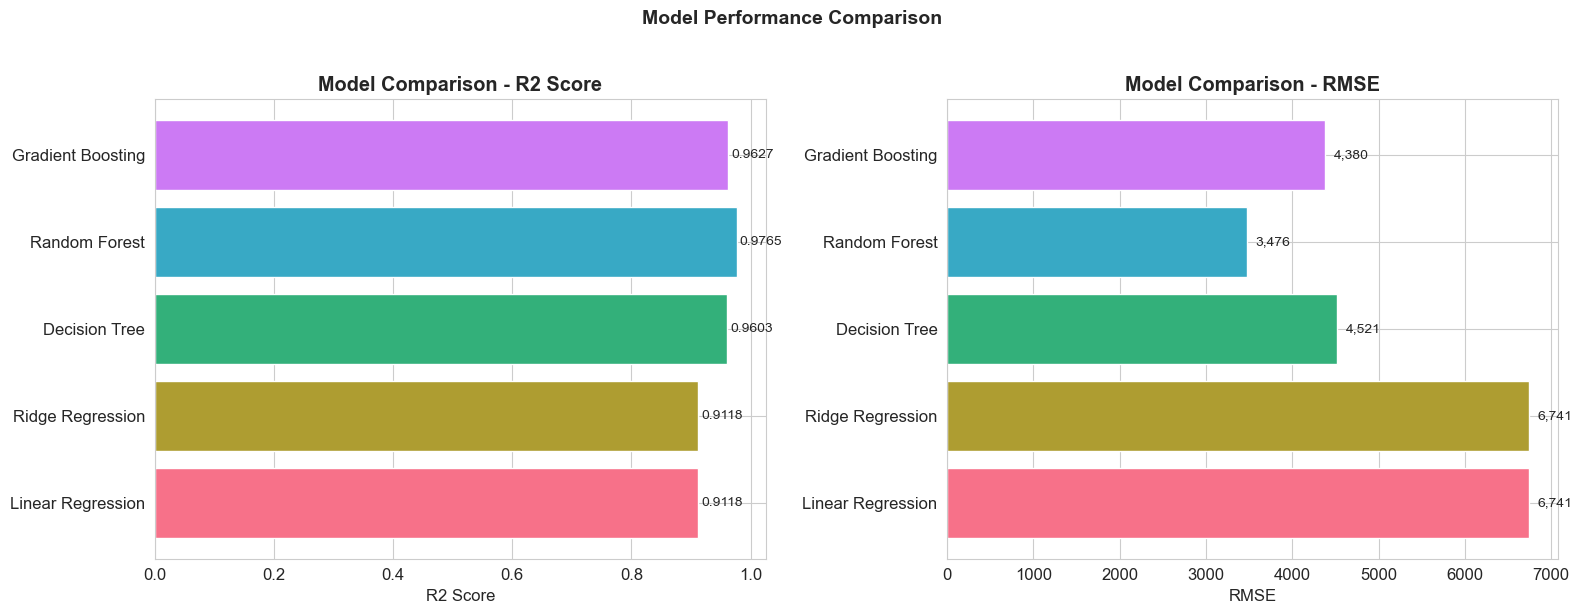

In [33]:
# ============================================================
# Cell 18: Model Comparison Visualization
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = sns.color_palette('husl', len(results_df))

# R2 comparison
bars1 = axes[0].barh(results_df.index, results_df['R2'], color=colors, edgecolor='white')
axes[0].set_xlabel('R2 Score')
axes[0].set_title('Model Comparison - R2 Score', fontweight='bold')
for bar in bars1:
    axes[0].text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2.,
                 f'{bar.get_width():.4f}', va='center', fontsize=10)

# RMSE comparison
bars2 = axes[1].barh(results_df.index, results_df['RMSE'], color=colors, edgecolor='white')
axes[1].set_xlabel('RMSE')
axes[1].set_title('Model Comparison - RMSE', fontweight='bold')
for bar in bars2:
    axes[1].text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2.,
                 f'{bar.get_width():,.0f}', va='center', fontsize=10)

plt.suptitle('Model Performance Comparison', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

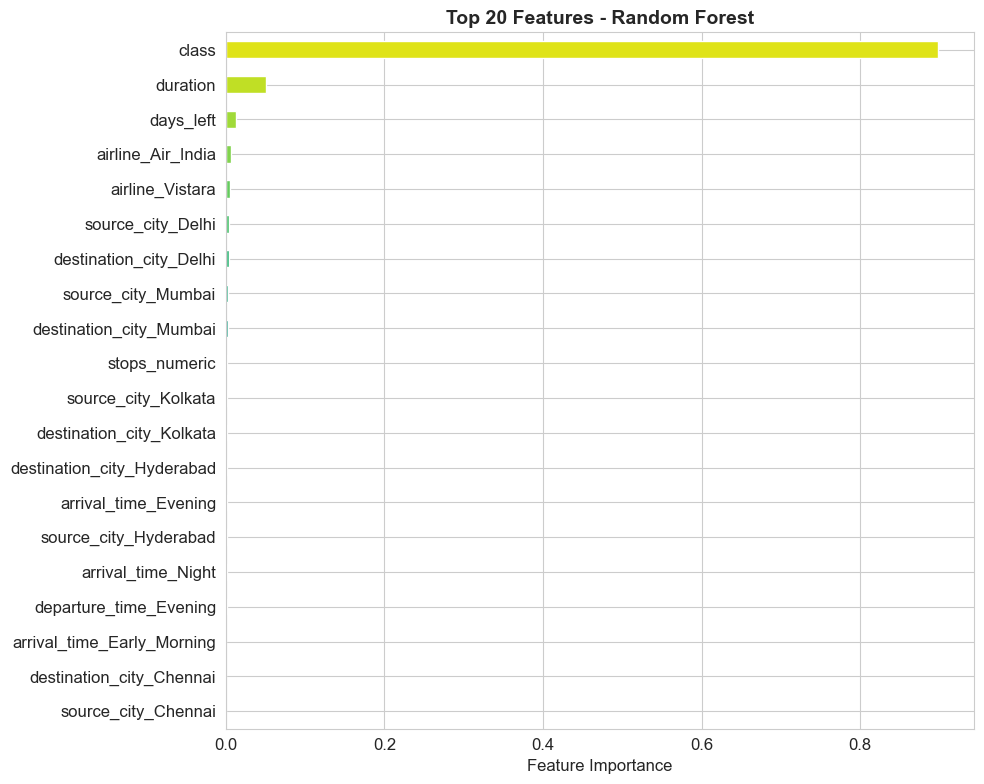


Top 5 most important features (Random Forest):
  1. class                         : 0.8988
  2. duration                      : 0.0506
  3. days_left                     : 0.0131
  4. airline_Air_India             : 0.0058
  5. airline_Vistara               : 0.0047


In [34]:
# ============================================================
# Cell 19: Feature Importance (Best Tree-Based Model)
# ============================================================
best_model = trained_models[best_model_name]

# Find a model with feature importances
fi_model_name = best_model_name
fi_model = best_model
if not hasattr(best_model, 'feature_importances_'):
    for name in ['Random Forest', 'Gradient Boosting', 'Decision Tree']:
        if name in trained_models:
            fi_model_name = name
            fi_model = trained_models[name]
            break

importances = fi_model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=True)

# Show top 20
top_n = min(20, len(feat_imp))
feat_imp_top = feat_imp.tail(top_n)

fig, ax = plt.subplots(figsize=(10, 8))
feat_imp_top.plot(kind='barh', ax=ax,
                 color=sns.color_palette('viridis', top_n), edgecolor='white')
ax.set_xlabel('Feature Importance')
ax.set_title(f'Top {top_n} Features - {fi_model_name}', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print(f'\nTop 5 most important features ({fi_model_name}):')
for rank, (feat, imp) in enumerate(feat_imp.tail(5).iloc[::-1].items(), 1):
    print(f'  {rank}. {feat:30s}: {imp:.4f}')

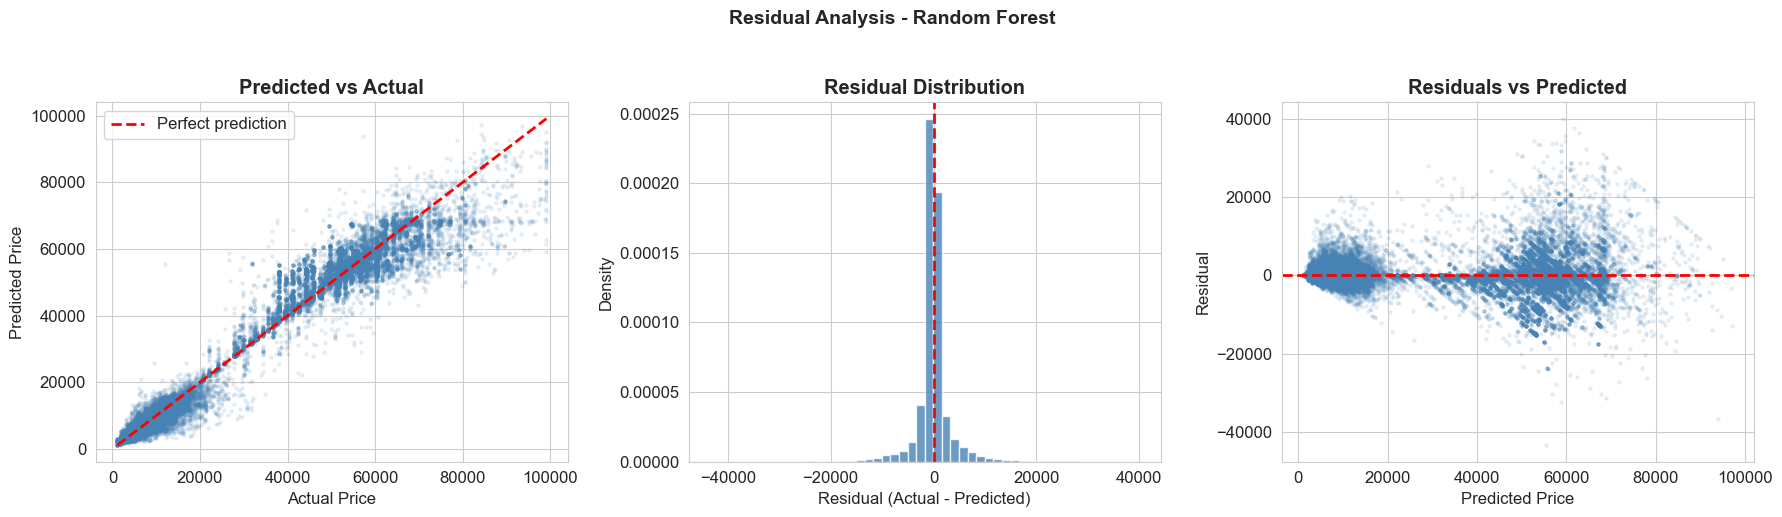

Residual Statistics:
  Mean residual:           -6 (should be ~0)
  Std of residual:      3,476
  Median residual:       -120


In [35]:
# ============================================================
# Cell 20: Residual Analysis - Best Model
# ============================================================
y_pred_best = trained_models[best_model_name].predict(X_test_scaled)
residuals = y_test - y_pred_best

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Predicted vs Actual
axes[0].scatter(y_test, y_pred_best, alpha=0.1, s=5, c='steelblue')
lims = [min(y_test.min(), y_pred_best.min()), max(y_test.max(), y_pred_best.max())]
axes[0].plot(lims, lims, 'r--', linewidth=2, label='Perfect prediction')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Predicted vs Actual', fontweight='bold')
axes[0].legend()

# Residual Distribution
axes[1].hist(residuals, bins=50, color='steelblue', edgecolor='white', alpha=0.8,
             density=True)
axes[1].axvline(x=0, color='red', linewidth=2, linestyle='--')
axes[1].set_xlabel('Residual (Actual - Predicted)')
axes[1].set_ylabel('Density')
axes[1].set_title('Residual Distribution', fontweight='bold')

# Residuals vs Predicted
axes[2].scatter(y_pred_best, residuals, alpha=0.1, s=5, c='steelblue')
axes[2].axhline(y=0, color='red', linewidth=2, linestyle='--')
axes[2].set_xlabel('Predicted Price')
axes[2].set_ylabel('Residual')
axes[2].set_title('Residuals vs Predicted', fontweight='bold')

plt.suptitle(f'Residual Analysis - {best_model_name}', fontsize=14, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()

print(f'Residual Statistics:')
print(f'  Mean residual:   {residuals.mean():>10,.0f} (should be ~0)')
print(f'  Std of residual: {residuals.std():>10,.0f}')
print(f'  Median residual: {np.median(residuals):>10,.0f}')

---

<div style="background: linear-gradient(135deg, #ff6b35 0%, #f7941e 50%, #fc4a1a 100%); color: #ffffff; padding: 30px 35px; border-radius: 15px; margin: 25px 0; box-shadow: 0 10px 25px rgba(255, 107, 53, 0.4);">
  <h2 style="margin: 0 0 10px 0; font-size: 1.9rem; font-weight: 700;">📝 Phase 8 — Key Insights & Conclusions</h2>
  <p style="margin: 0; font-size: 1.05rem; line-height: 1.5;">Summary of findings, model performance, and actionable recommendations.</p>
</div>

In [36]:
# ============================================================
# Cell 21: Summary & Conclusions
# ============================================================

print('='*70)
print('                  ANALYSIS SUMMARY & KEY FINDINGS')
print('='*70)

print('\nDATASET OVERVIEW')
print(f'   {len(df):,} flight records across 6 Indian cities')
print(f'   {df["airline"].nunique()} airlines, {df["route"].nunique()} unique routes')
print(f'   Price range: {df["price"].min():,.0f} to {df["price"].max():,.0f}')
print(f'   No missing values, clean dataset')

print('\nKEY EDA FINDINGS')
print('   Class is the strongest price differentiator (Business ~4-6x Economy)')
print('   Vistara and Air India dominate the higher price segment (they offer Business class)')
print('   SpiceJet, AirAsia, Indigo, GO_FIRST are Economy-only carriers with lower prices')
print('   Price increases with number of stops (longer duration)')
print('   Last-minute bookings (1-2 days) show lower average prices')
print('   Delhi and Mumbai are the busiest source cities')

print('\nMODEL PERFORMANCE')
print(f'   Best Model: {best_model_name}')
print(f'   Test R2:    {results_df.loc[best_model_name, "R2"]:.4f}')
print(f'   Test RMSE:  {results_df.loc[best_model_name, "RMSE"]:,.0f}')
print(f'   Test MAE:   {results_df.loc[best_model_name, "MAE"]:,.0f}')
print(f'   Test MAPE:  {results_df.loc[best_model_name, "MAPE"]:.2f}%')

print('\n   All Models (Test R2):')
for name, row in results_df.sort_values('R2', ascending=False).iterrows():
    bar_len = int(row['R2'] * 50)
    bar = '#' * bar_len
    print(f'   {name:25s}: {row["R2"]:.4f}  {bar}')

print('\nCRITICAL INSIGHT')
print('   Including properly encoded categorical features (airline, class, source_city,')
print('   destination_city, departure_time, arrival_time) is ESSENTIAL for price prediction.')
print('   Models using only numerical features (duration, days_left) achieve R2 ~ 0.09.')
print(f'   With all features, the best model achieves R2 ~ {results_df["R2"].max():.2f}.')

print('\nRECOMMENDATIONS')
print('   1. Use tree-based models (Random Forest / Gradient Boosting) for best performance')
print('   2. class and airline are the top predictors - always include them')
print('   3. Consider hyperparameter tuning (GridSearch/RandomSearch) for further gains')
print('   4. For production, consider XGBoost or LightGBM for faster training at scale')
print()
print('='*70)
print('                        ANALYSIS COMPLETE')
print('='*70)

                  ANALYSIS SUMMARY & KEY FINDINGS

DATASET OVERVIEW
   300,153 flight records across 6 Indian cities
   6 airlines, 30 unique routes
   Price range: 1,105 to 123,071
   No missing values, clean dataset

KEY EDA FINDINGS
   Class is the strongest price differentiator (Business ~4-6x Economy)
   Vistara and Air India dominate the higher price segment (they offer Business class)
   SpiceJet, AirAsia, Indigo, GO_FIRST are Economy-only carriers with lower prices
   Price increases with number of stops (longer duration)
   Last-minute bookings (1-2 days) show lower average prices
   Delhi and Mumbai are the busiest source cities

MODEL PERFORMANCE
   Best Model: Random Forest
   Test R2:    0.9765
   Test RMSE:  3,476
   Test MAE:   1,783
   Test MAPE:  12.32%

   All Models (Test R2):
   Random Forest            : 0.9765  ################################################
   Gradient Boosting        : 0.9627  ################################################
   Decision Tree   

---

<div style="background: linear-gradient(135deg, #ff6b35 0%, #f7941e 50%, #fc4a1a 100%); color: #ffffff; padding: 30px 35px; border-radius: 15px; margin: 25px 0; box-shadow: 0 10px 25px rgba(255, 107, 53, 0.4);">
  <h2 style="margin: 0 0 10px 0; font-size: 1.9rem; font-weight: 700;">End  </h2>
  <p style="margin: 0; font-size: 1.05rem; line-height: 1.5;"></p>
</div>